***Половников Никита***

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

**Для работы был выбран датасет базы пользователей Netflix.**

https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset/data

In [2]:
data = pd.read_csv('Netflix_Userbase.csv')

In [3]:
data

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [4]:
a = data['Join Date']
a = a.to_list()

In [5]:
for i in range(len(a)): a[i] = datetime.datetime.strptime(a[i],'%d-%m-%y')

In [6]:
delta = []
for i in range(len(a)):
    delta.append((datetime.datetime.today().date() - a[i].date()).days)


In [7]:
data['Days Using'] = delta

In [8]:
data

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Days Using
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,710
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,842
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,301
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,534
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,239
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,519
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,509
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,504
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,501


# Сформировать двухвыборочные гипотезы касательно медиан и распределений для дискретного и непрерывного случая. Если дискретного показателя нет - создайте его дополнительно. Итого 4 гипотезы (4 пункта).

**Гипотезы распределений**

Тест колмагорова - непр. распр. (М и Ж количество дней на платформе)

Тест пирсона - дискр. распр. (М и Ж типы подписки)


**Гипотезы о равенстве медиан**


Критерий Мана-Уитни - Медиана Monthly Revenue(дискретный случай (М и Ж))

Мана-Уитни - медиана возраста (непрерывный случай(М и Ж)) 

***Зафиксируем для каждого теста уровень значимости*** 

$\alpha = 0.05$

### 1. $ \mathbb{H_0}$:  распределения количества дней пользования сервисом у мужчин  и женщин одинаковы. 

***Критрий Колмогорова***

Воспользуемся критерием однородности Колмогорова, т.к. он используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения в непрерывном случае.

In [9]:
days_using = data[['Days Using', 'Gender']]
male_days_using = days_using[days_using['Gender'] == 'Male']['Days Using']
female_days_using = days_using[days_using['Gender'] == 'Female']['Days Using']


In [10]:
sp.kstest(male_days_using, female_days_using)

KstestResult(statistic=0.02858393639224526, pvalue=0.670981894092662, statistic_location=415, statistic_sign=-1)

***p-val >*** $\normalsize \alpha$ ***=> принимаем нулевую гипотезу***

### 2. $ \mathbb{H_0}$:  распределения типов подписки мужчин  и женщин одинаковы. 

***Критерий Пирсона***

Воспользуемся критерием Пирсона, т.к. он используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения в дискретном случае.

In [11]:
sub_type = data[['Subscription Type', 'Gender']]
male_sub_type = sub_type[sub_type['Gender'] == 'Male']['Subscription Type']
female_sub_type = sub_type[sub_type['Gender'] == 'Female']['Subscription Type']


In [12]:
arr = [list(female_sub_type.value_counts()),list(male_sub_type.value_counts())]
arr

[[512, 381, 364], [487, 387, 369]]

In [13]:
sp.chi2_contingency(arr)

Chi2ContingencyResult(statistic=0.6282267388216123, pvalue=0.7304362143419852, dof=2, expected_freq=array([[502.2972, 386.1504, 368.5524],
       [496.7028, 381.8496, 364.4476]]))

***p-val >*** $\normalsize \alpha$ ***=> принимаем нулевую гипотезу***

### 3. $ \mathbb{H_0}$:  медианы возрастов мужчин  и женщин одинаковы. 

***Критерий Мана-Уитни***

Воспользуемся критерием Мана-Уитни, т.к. он используется для проверки гипотезы о равенстве функций распределения двух выборок против альтернативной гипотезы об их сдвиге.

In [14]:
age = data[['Gender', 'Age']]
male_age = age[age['Gender'] == 'Male']['Age']
female_age = age[age['Gender'] == 'Female']['Age']

In [15]:
sp.mannwhitneyu(male_age, female_age)

MannwhitneyuResult(statistic=745214.5, pvalue=0.045805284421959414)

***p-val < $\normalsize \alpha$ => отвергаем нулевую гипотезу***

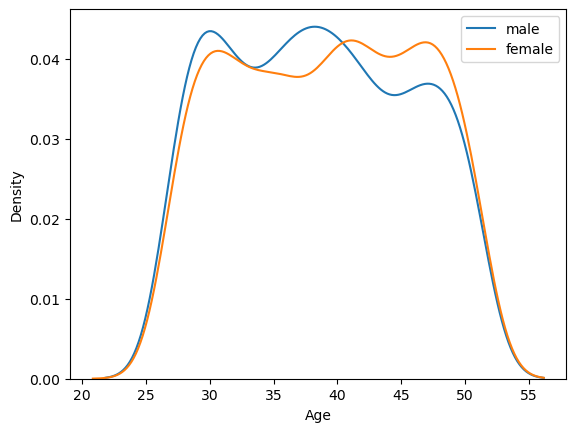

In [16]:
sns.kdeplot(male_age, label='male')
sns.kdeplot(female_age, label='female')
plt.legend()

### 4. $ \mathbb{H_0}$:  медианы заработков платформы с мужчин  и женщин одинаковы. 


***Критерий Мана-Уитни***

Воспользуемся критерием Мана-Уитни, т.к. он используется для проверки гипотезы о равенстве функций распределения двух выборок против альтернативной гипотезы об их сдвиге.

In [17]:
revenue = data[['Monthly Revenue', 'Gender']]
male_revenue = revenue[revenue['Gender'] == 'Male']['Monthly Revenue']
female_revenue = revenue[revenue['Gender'] == 'Female']['Monthly Revenue']

In [18]:
sp.mannwhitneyu(male_revenue, female_revenue)

MannwhitneyuResult(statistic=775585.0, pvalue=0.751232906998015)

***p-val > $\normalsize \alpha$ => принимаем нулевую гипотезу***

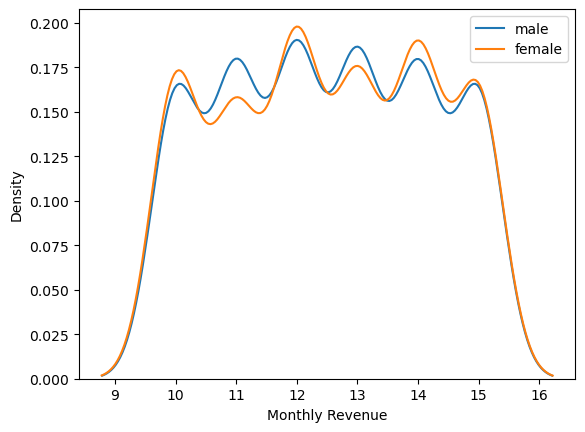

In [19]:
sns.kdeplot(male_revenue, label='male')
sns.kdeplot(female_revenue, label='female')
plt.legend()

### 5. Проверка результатов бутстрапом

###  $ \mathbb{H_0}$:  распределения количества дней пользования сервисом у мужчин  и женщин одинаковы. 

In [20]:
observed_statistic = sp.kstest(male_days_using, female_days_using).statistic

bootstrap_statistics = []

for _ in range(1000):
    bootstrap_male_days_using = np.random.choice(male_days_using, size = len(male_days_using), replace=True)
    bootstrap_female_days_using = np.random.choice(female_days_using, size = len(female_days_using), replace=True)
    bootstrap_statistic = sp.kstest(bootstrap_male_days_using, bootstrap_female_days_using).statistic
    bootstrap_statistics.append(bootstrap_statistic)
    bootstrap_statistic = 0
    
p_value = np.mean(np.array(bootstrap_statistics) >= observed_statistic)

# Вывод результатов
print("Наблюдаемая статистика Колмогорова:", observed_statistic)
print("p-value:", p_value)

# Проверка статистической значимости (обычно p-значение < 0.05)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - медианы различны.")
else:
    print("Принимаем нулевую гипотезу - медианы одинаковы.")

Наблюдаемая статистика Колмогорова: 0.02858393639224526
p-value: 0.923
Принимаем нулевую гипотезу - медианы одинаковы.


pvalue=0.67098189409266

**Результаты бутстрапа показали лучшую точность в сравнении с Критерием Колмогорова.**

Оценим при помощи бутстрапа 4 момента (<ins>***мат. ожидание***</ins> , <ins>***дисперсию***</ins>, <ins>***коэффициент асимметрии***</ins> (симметричность распределения), <ins>***коэффициент эксцесса***</ins>(тяжесть хвостов распределения)

In [21]:
means_list_1 = []
means_list_2 = []

vars_list_1 = []
vars_list_2 = []

skews_list_1 = []
skews_list_2 = []

kurts_list_1 = []
kurts_list_2 = []

for _ in range(1000):
    means_temp_1 = np.random.choice(male_days_using, size = len(male_days_using), replace=True)
    means_list_1.append(np.mean(means_temp_1))
    means_temp_2 = np.random.choice(female_days_using, size = len(female_days_using), replace=True)
    means_list_2.append(np.mean(means_temp_2))
    
    vars_temp_1 = np.random.choice(male_days_using, size = len(male_days_using), replace=True)
    vars_list_1.append(np.var(vars_temp_1))
    vars_temp_2 = np.random.choice(female_days_using, size = len(female_days_using), replace=True)
    vars_list_2.append(np.var(vars_temp_2))
   
    skew_temp_1 = np.random.choice(male_days_using, size = len(male_days_using), replace=True)
    skews_list_1.append(sp.skew(skew_temp_1))
    skew_temp_2 = np.random.choice(female_days_using, size = len(female_days_using), replace=True)
    skews_list_2.append(sp.skew(skew_temp_2))  
    
    kurt_temp_1 = np.random.choice(male_days_using, size = len(male_days_using), replace=True)
    kurts_list_1.append(sp.kurtosis(kurt_temp_1))
    kurt_temp_2 = np.random.choice(female_days_using, size = len(female_days_using), replace=True)
    kurts_list_2.append(sp.kurtosis(kurt_temp_2))

means_left_1 = np.percentile(means_list_1, q=[2.5, 97.5]).round(3)[0]
means_right_1 = np.percentile(means_list_1, q=[2.5, 97.5]).round(3)[1]

means_left_2 = np.percentile(means_list_2, q=[2.5, 97.5]).round(3)[0]
means_right_2 = np.percentile(means_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для мат. ожидания:','\n')
print('мужчин: [', means_left_1, ',', means_right_1,']')
print('среднее значение мужчин:',male_days_using.mean())
print('женщин: [', means_left_2, ',', means_right_2,']')
print('среднее значение женщин:',female_days_using.mean(), '\n')


vars_left_1 = np.percentile(vars_list_1, q=[2.5, 97.5]).round(3)[0]
vars_right_1 = np.percentile(vars_list_1, q=[2.5, 97.5]).round(3)[1]

vars_left_2 = np.percentile(vars_list_2, q=[2.5, 97.5]).round(3)[0]
vars_right_2 = np.percentile(vars_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для дисперсии:','\n')
print('мужчин: [', vars_left_1, ',', vars_right_1,']')
print('дисперсия у мужчин:', male_days_using.var())
print('женщин: [', vars_left_2, ',', vars_right_2,']')
print('дисперсия у женщин:',female_days_using.var(), '\n')


skews_left_1 = np.percentile(skews_list_1, q=[2.5, 97.5]).round(3)[0]
skews_right_1 = np.percentile(skews_list_1, q=[2.5, 97.5]).round(3)[1]

skews_left_2 = np.percentile(skews_list_2, q=[2.5, 97.5]).round(3)[0]
skews_right_2 = np.percentile(skews_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для коэффициента ассиметрии:','\n')
print('мужчин: [', skews_left_1, ',', skews_right_1,']')
print('коэффициент ассиметрии у мужчин:', male_days_using.skew())
print('женщин: [', skews_left_2, ',', skews_right_2,']')
print('коэффициент ассиметрии у женщин:',female_days_using.skew(), '\n')


kurts_left_1 = np.percentile(kurts_list_1, q=[2.5, 97.5]).round(3)[0]
kurts_right_1 = np.percentile(kurts_list_1, q=[2.5, 97.5]).round(3)[1]

kurts_left_2 = np.percentile(kurts_list_2, q=[2.5, 97.5]).round(3)[0]
kurts_right_2 = np.percentile(kurts_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для коэффициента эксцесса:','\n')
print('мужчин: [', kurts_left_1, ',', kurts_right_1,']')
print('коэффициент эксцесса у мужчин:', male_days_using.kurt())
print('женщин: [', kurts_left_2, ',', kurts_right_2,']')
print('коэффициент эксцесса у женщин:',female_days_using.kurt(), '\n')

Д.И. для мат. ожидания: 

мужчин: [ 482.359 , 489.474 ]
среднее значение мужчин: 485.79163314561544
женщин: [ 479.349 , 485.757 ]
среднее значение женщин: 482.72155926809864 

Д.И. для дисперсии: 

мужчин: [ 3599.356 , 4806.168 ]
дисперсия у мужчин: 4170.475871968367
женщин: [ 3474.679 , 4398.164 ]
дисперсия у женщин: 3936.850752980762 

Д.И. для коэффициента ассиметрии: 

мужчин: [ 0.014 , 0.977 ]
коэффициент ассиметрии у мужчин: 0.5257298603579299
женщин: [ -0.067 , 0.679 ]
коэффициент ассиметрии у женщин: 0.30289913335099744 

Д.И. для коэффициента эксцесса: 

мужчин: [ 2.899 , 5.3 ]
коэффициент эксцесса у мужчин: 4.231724527549778
женщин: [ 1.25 , 3.826 ]
коэффициент эксцесса у женщин: 2.515264629639182 



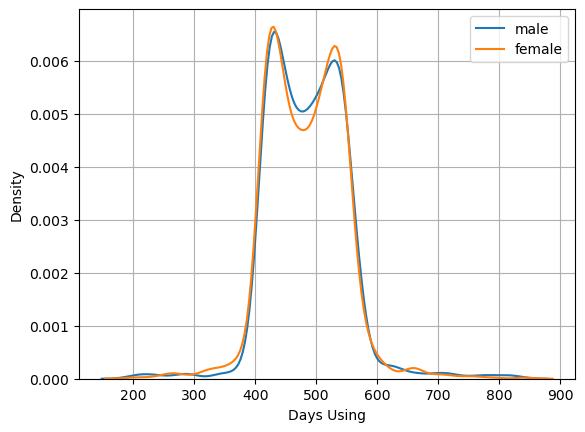

In [22]:
sns.kdeplot(male_days_using, label='male')
sns.kdeplot(female_days_using, label='female')

plt.legend()
plt.grid()

### $ \mathbb{H_0}$:  медианы возрастов мужчин  и женщин одинаковы. 

In [23]:
observed_statistic = sp.mannwhitneyu(male_age, female_age).statistic

bootstrap_statistics = []

for _ in range(1000):
    bootstrap_male_age = np.random.choice(male_age, size = len(male_age), replace=True)
    bootstrap_female_age = np.random.choice(female_age, size = len(female_age), replace=True)
    bootstrap_statistic = sp.mannwhitneyu(bootstrap_male_age, bootstrap_female_age).statistic
    bootstrap_statistics.append(bootstrap_statistic)
    bootstrap_statistic = 0
    
p_value = np.mean(np.array(bootstrap_statistics) >= observed_statistic)

# Вывод результатов
print("Наблюдаемая статистика Мана-Уитни:", observed_statistic)
print("p-value:", p_value)

# Проверка статистической значимости (обычно p-значение < 0.05)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - медианы различны.")
else:
    print("Принимаем нулевую гипотезу - медианы одинаковы.")

Наблюдаемая статистика Мана-Уитни: 745214.5
p-value: 0.509
Принимаем нулевую гипотезу - медианы одинаковы.


Тест Мана-Уитни:

pvalue=0.045

**В данном случае тест Мана-Уитни показал лучший результат.**

Чтобы убедиться в этом оценим моменты и медиану бутстрапом.

In [24]:
means_list_1 = []
means_list_2 = []

vars_list_1 = []
vars_list_2 = []

skews_list_1 = []
skews_list_2 = []

kurts_list_1 = []
kurts_list_2 = []

medians_list_1 = []
medians_list_2 = []


for _ in range(1000):
    means_temp_1 = np.random.choice(male_age, size = len(male_age), replace=True)
    means_list_1.append(np.mean(means_temp_1))
    means_temp_2 = np.random.choice(female_age, size = len(female_age), replace=True)
    means_list_2.append(np.mean(means_temp_2))
    
    vars_temp_1 = np.random.choice(male_age, size = len(male_age), replace=True)
    vars_list_1.append(np.var(vars_temp_1))
    vars_temp_2 = np.random.choice(female_age, size = len(female_age), replace=True)
    vars_list_2.append(np.var(vars_temp_2))
   
    skew_temp_1 = np.random.choice(male_age, size = len(male_age), replace=True)
    skews_list_1.append(sp.skew(skew_temp_1))
    skew_temp_2 = np.random.choice(female_age, size = len(female_age), replace=True)
    skews_list_2.append(sp.skew(skew_temp_2))  
    
    kurt_temp_1 = np.random.choice(male_age, size = len(male_age), replace=True)
    kurts_list_1.append(sp.kurtosis(kurt_temp_1))
    kurt_temp_2 = np.random.choice(female_age, size = len(female_age), replace=True)
    kurts_list_2.append(sp.kurtosis(kurt_temp_2))

    median_temp_1 = np.random.choice(male_age, size = len(male_age), replace=True)
    medians_list_1.append(np.median(median_temp_1))
    median_temp_2 = np.random.choice(female_age, size = len(female_age), replace=True)
    medians_list_2.append(np.median(median_temp_2))
    
means_left_1 = np.percentile(means_list_1, q=[2.5, 97.5]).round(3)[0]
means_right_1 = np.percentile(means_list_1, q=[2.5, 97.5]).round(3)[1]

means_left_2 = np.percentile(means_list_2, q=[2.5, 97.5]).round(3)[0]
means_right_2 = np.percentile(means_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для мат. ожидания:','\n')
print('мужчин: [', means_left_1, ',', means_right_1,']')
print('среднее значение мужчин:',male_age.mean())
print('женщин: [', means_left_2, ',', means_right_2,']')
print('среднее значение женщин:',female_age.mean(), '\n')


vars_left_1 = np.percentile(vars_list_1, q=[2.5, 97.5]).round(3)[0]
vars_right_1 = np.percentile(vars_list_1, q=[2.5, 97.5]).round(3)[1]

vars_left_2 = np.percentile(vars_list_2, q=[2.5, 97.5]).round(3)[0]
vars_right_2 = np.percentile(vars_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для дисперсии:','\n')
print('мужчин: [', vars_left_1, ',', vars_right_1,']')
print('дисперсия у мужчин:', male_age.var())
print('женщин: [', vars_left_2, ',', vars_right_2,']')
print('дисперсия у женщин:',female_age.var(), '\n')


skews_left_1 = np.percentile(skews_list_1, q=[2.5, 97.5]).round(3)[0]
skews_right_1 = np.percentile(skews_list_1, q=[2.5, 97.5]).round(3)[1]

skews_left_2 = np.percentile(skews_list_2, q=[2.5, 97.5]).round(3)[0]
skews_right_2 = np.percentile(skews_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для коэффициента ассиметрии:','\n')
print('мужчин: [', skews_left_1, ',', skews_right_1,']')
print('коэффициент ассиметрии у мужчин:', male_age.skew())
print('женщин: [', skews_left_2, ',', skews_right_2,']')
print('коэффициент ассиметрии у женщин:',female_age.skew(), '\n')


kurts_left_1 = np.percentile(kurts_list_1, q=[2.5, 97.5]).round(3)[0]
kurts_right_1 = np.percentile(kurts_list_1, q=[2.5, 97.5]).round(3)[1]

kurts_left_2 = np.percentile(kurts_list_2, q=[2.5, 97.5]).round(3)[0]
kurts_right_2 = np.percentile(kurts_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для коэффициента эксцесса:','\n')
print('мужчин: [', kurts_left_1, ',', kurts_right_1,']')
print('коэффициент эксцесса у мужчин:', male_age.kurt())
print('женщин: [', kurts_left_2, ',', kurts_right_2,']')
print('коэффициент эксцесса у женщин:',female_age.kurt(), '\n')

medians_left_1 = np.percentile(medians_list_1, q=[2.5, 97.5]).round(3)[0]
medians_right_1 = np.percentile(medians_list_1, q=[2.5, 97.5]).round(3)[1]

medians_left_2 = np.percentile(medians_list_2, q=[2.5, 97.5]).round(3)[0]
medians_right_2 = np.percentile(medians_list_2, q=[2.5, 97.5]).round(3)[1]

print('Д.И. для Медианы:','\n')
print('мужчин: [', medians_left_1, ',', medians_right_1,']')
print('медиана возраста у мужчин:', male_age.median())
print('женщин: [', medians_left_2, ',', medians_right_2,']')
print('медиана возраста у женщин:',female_age.median(), '\n')

Д.И. для мат. ожидания: 

мужчин: [ 38.088 , 38.872 ]
среднее значение мужчин: 38.51005631536605
женщин: [ 38.666 , 39.488 ]
среднее значение женщин: 39.077963404932376 

Д.И. для дисперсии: 

мужчин: [ 48.507 , 53.699 ]
дисперсия у мужчин: 51.22111457009507
женщин: [ 48.941 , 53.869 ]
дисперсия у женщин: 51.52576400184443 

Д.И. для коэффициента ассиметрии: 

мужчин: [ 0.005 , 0.159 ]
коэффициент ассиметрии у мужчин: 0.08272281244469663
женщин: [ -0.102 , 0.053 ]
коэффициент ассиметрии у женщин: -0.02463780419108591 

Д.И. для коэффициента эксцесса: 

мужчин: [ -1.234 , -1.092 ]
коэффициент эксцесса у мужчин: -1.1712973317527071
женщин: [ -1.276 , -1.15 ]
коэффициент эксцесса у женщин: -1.2179916524255465 

Д.И. для Медианы: 

мужчин: [ 38.0 , 39.0 ]
медиана возраста у мужчин: 38.0
женщин: [ 39.0 , 40.0 ]
медиана возраста у женщин: 39.0 



***Как можно заметить, Д.И. медиан у мужчин и женщин не пересекаются. Это опровергает гипотезу о равенстве медиан и подтверждает, что тест Мана-Уитни на данном примере сработал лучше.***

***Также по оценке среднего, можно понять, что в данных имеется сдвиг.***

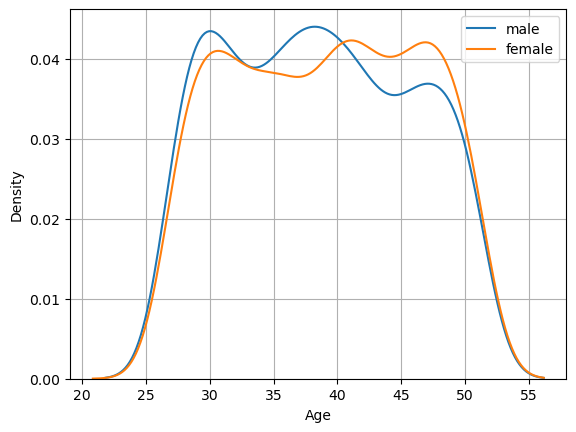

In [25]:
sns.kdeplot(male_age, label='male')
sns.kdeplot(female_age, label='female')

plt.legend()
plt.grid()

### $ \mathbb{H_0}$:  распределения типов подписки мужчин  и женщин одинаковы. 

In [26]:
sub_type = [list(female_sub_type.value_counts()),list(male_sub_type.value_counts())]

observed_statistic = sp.chi2_contingency(sub_type, None).statistic

bootstrap_statistics = []
for _ in range(10000):
    bootstrap_sample_data = [np.random.choice(sub_type[0], size = 3, replace=True),
                             np.random.choice(sub_type[1], size = 3, replace=True) ]
    bootstrap_statistic = sp.chi2_contingency(bootstrap_sample_data).statistic
    bootstrap_statistics.append(bootstrap_statistic)
    bootstrap_sample_data = [[],[]]
    bootstrap_statistic = 0
    
p_value = np.mean(bootstrap_statistics >= observed_statistic)

# Вывод результатов
print("Наблюдаемая статистика хи-квадрат:", observed_statistic)
print("p-value:", p_value)

# Проверка статистической значимости (обычно p-значение < 0.05)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - распределения различны.")
else:
    print("Принимаем нулевую гипотезу - распределения одинаковы.")

Наблюдаемая статистика хи-квадрат: 0.6282267388216123
p-value: 0.877
Принимаем нулевую гипотезу - распределения одинаковы.


Критерий Пирсона:

pvalue=0.7304362143419852


**В данном случае бутстрап оказался мощнее критерия Пирсона.**


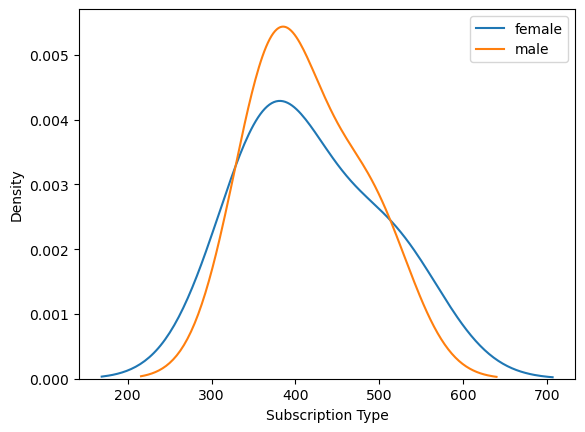

In [27]:
sns.kdeplot(female_sub_type.value_counts(), label='female')
sns.kdeplot(male_sub_type.value_counts(), label='male')
plt.legend()

### $ \mathbb{H_0}$:  медианы заработков платформы с мужчин  и женщин одинаковы. 

In [28]:
observed_statistic = sp.mannwhitneyu(male_revenue, female_revenue).statistic

bootstrap_statistics = []

for _ in range(1000):
    bootstrap_male_revenue = np.random.choice(male_revenue, size = len(male_revenue), replace=True)
    bootstrap_female_revenue = np.random.choice(female_revenue, size = len(female_revenue), replace=True)
    bootstrap_statistic = sp.mannwhitneyu(bootstrap_male_revenue, bootstrap_female_revenue).statistic
    bootstrap_statistics.append(bootstrap_statistic)
    bootstrap_sample_data = [[],[]]
    bootstrap_statistic = 0
    
p_value = np.mean(bootstrap_statistics >= observed_statistic)

# Вывод результатов
print("Наблюдаемая статистика Мана-Уитни:", observed_statistic)
print("p-value:", p_value)

# Проверка статистической значимости (обычно p-значение < 0.05)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - медианы различны.")
else:
    print("Принимаем нулевую гипотезу - медианы одинаковы.")

Наблюдаемая статистика Мана-Уитни: 775585.0
p-value: 0.486
Принимаем нулевую гипотезу - медианы одинаковы.


тест Мана-Уитни 

pvalue=0.751

**Результаты бутстрапа показали меньшую точность в сравнении с тестом Мана-Уитни.**

**Это может быть связано с тем, что данные имеют распределение похожее на нормальное.**

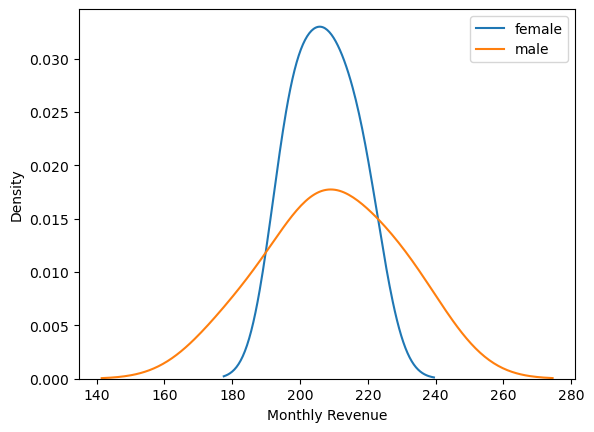

In [29]:
sns.kdeplot(male_revenue.value_counts(), label='female')
sns.kdeplot(female_revenue.value_counts(), label='male')
plt.legend()